# Introducción

En este análisis, nuestro objetivo principal es explorar las relaciones causales que podrían influir en la probabilidad de aprobar la primera evaluación del curso, utilizando la biblioteca DoWhy en Python. Previamente, se llevó a cabo un análisis de importancia de características utilizando SHAP, identificando varias características que parecen tener un impacto significativo. Ahora, con DoWhy, intentamos ir más allá del mero diagnóstico de importancia y explorar cómo estas características interactúan y posiblemente causan los cambios observados en la probabilidad de aprobación.

## Análisis de Características Principales con SHAP

Inicialmente, realizamos un análisis con SHAP para identificar las características más relevantes que afectan la probabilidad de aprobación. Según este análisis, las características más influyentes son:

- `hito1`
- `e29`
- `exitosos`
- `fallidos`
- `e42`
- `e3`
- `e35`
- `e13`
- `e26`
- `e18`
- `e32`
- `e10`
- `e0`
- `e4`
- `e23`
- `e7`
- `e17`
- `e25`
- `e22`
- `e8`

Estas características fueron identificadas como las más críticas, excluyendo `hito2` y otras columnas no listadas.

## Integración con Análisis de Causalidad DoWhy

Para profundizar nuestro entendimiento, integramos los insights obtenidos a través de SHAP con un análisis de causalidad utilizando DoWhy. Este análisis nos permite investigar cómo las características identificadas como importantes por SHAP influyen causalmente en la aprobación. A través de este análisis, buscamos responder preguntas cruciales como:

1. ¿Cómo la variación en `hito1` afecta directa e indirectamente la aprobación?
2. ¿Cómo la variación en `exitosos` afecta directa e indirectamente la aprobación?
3. ¿Cómo la variación en `fallidos` afecta directa e indirectamente la aprobación?
4. ¿Cómo los efectos causales identificados pueden influir en la estrategia de intervención para mejorar las tasas de aprobación?


In [29]:
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from IPython.core.display import Image, display
import dowhy.causal_estimators.linear_regression_estimator

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../../../"))

from custom import functions

warnings.filterwarnings("ignore")

../../../resources/allColProSol.xlsx
../../../resources/dataset_a_2021.csv
../../../resources/dataset_a_2021c2.csv
../../../resources/dataset_a_2021v1.xlsx
../../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../../resources/dataset_unab_P1.csv
../../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../../resources/exitoFallidoProgramaSol.xlsx
../../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../../resources/exitososFallidosEnviosSol.xlsx
../../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../../resources/sinColCeroExitosoFallidosSol.xlsx
../../../resources/v2_hitosExitoFalloColESol1.csv
../../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../../resources/v2_hitosExitoFalloSol1Programa.csv
../../../resources/causalidad\causalidad.dot
../../../resources/causalidad\causalidad.png
../../../resources/causalidad\causalidad_e29.dot
../../../resourc

In [30]:
# Read and preview data
df = pd.read_csv(
    "../../../resources/v2_hitosExitoFalloColESol1.csv",
    delimiter=";",
    skipinitialspace=True,
)

In [31]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


In [32]:
# Paso 1: Modelar un problema causal
model_hito1 = CausalModel(
    data=df,
    treatment="hito1",  # Variable tratada (exposición)
    outcome="aprobado",  # Variable de resultado
    common_causes=[
        "exitosos",
        "fallidos",
        "e42",
        "e35",
        "e32",
        "e29",
        "e26",
        "e25",
        "e23",
        "e22",
        "e18",
        "e17",
        "e13",
        "e10",
        "e8",
        "e7",
        "e4",
        "e3",
        "e0",
    ],  # Variables de causa común
)
# Visualizar el modelo causal con la variable de causa común no observada
# model_hito1.view_model(
#     layout="dot",
#     file_name="../../../resources/causalidad/graph_causal_model_hito1_pruebaa",
# )

In [33]:
# Paso 1: Modelar un problema causal
model_exitosos = CausalModel(
    data=df,
    treatment="exitosos",  # Variable tratada (exposición)
    outcome="aprobado",  # Variable de resultado
    common_causes=[
        "hito1",
        "fallidos",
        "e42",
        "e35",
        "e32",
        "e29",
        "e26",
        "e25",
        "e23",
        "e22",
        "e18",
        "e17",
        "e13",
        "e10",
        "e8",
        "e7",
        "e4",
        "e3",
        "e0",
    ],  # Variables de causa común
)
# Visualizar el modelo causal con la variable de causa común no observada
# model_exitosos.view_model(
#     layout="dot",
#     file_name="../../../resources/causalidad/graph_causal_model_exitosos_pruebaa",
# )

In [34]:
# Paso 1: Modelar un problema causal
model_fallidos = CausalModel(
    data=df,
    treatment="fallidos",  # Variable tratada (exposición)
    outcome="aprobado",  # Variable de resultado
    common_causes=[
        "hito1",
        "exitosos",
        "e42",
        "e35",
        "e32",
        "e29",
        "e26",
        "e25",
        "e23",
        "e22",
        "e18",
        "e17",
        "e13",
        "e10",
        "e8",
        "e7",
        "e4",
        "e3",
        "e0",
    ],  # Variables de causa común
)
# Visualizar el modelo causal con la variable de causa común no observada
# model_fallidos.view_model(
#     layout="dot",
#     file_name="../../../resources/causalidad/graph_causal_model_fallidos_pruebaa",
# )

In [35]:
modelos = [model_hito1, model_exitosos, model_fallidos]
resultados = []  # Lista para almacenar los resultados de cada modelo

In [36]:
for i, model in enumerate(modelos):
    print(model._treatment[0])
    print(f"Procesando modelo {i + 1} de {len(modelos)}")

    # Paso 2: Identificar el estimando objetivo bajo el modelo
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

    # Paso 3: Estimar el efecto causal usando un método basado en árboles
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.econml.dml.DML",
        control_value=0,
        treatment_value=1,
        target_units="ate",  # Average Treatment Effect
        method_params={
            "init_params": {
                "model_y": RandomForestRegressor(),
                "model_t": RandomForestRegressor(),
                "model_final": RandomForestRegressor(
                    max_depth=10,
                    min_samples_split=10,
                    min_samples_leaf=5,
                    random_state=1502,
                    n_estimators=500,
                ),
                "featurizer": None,
            },
            "fit_params": {},
        },
    )

    # Refutador de datos aleatorios
    refute1 = model.refute_estimate(
        identified_estimand, estimate, method_name="random_common_cause"
    )
    # Refutador de causa común no observada
    refute2 = model.refute_estimate(
        identified_estimand,
        estimate,
        method_name="add_unobserved_common_cause",
        confounders_effect_on_treatment="binary_flip",
        confounders_effect_on_outcome="binary_flip",
        effect_strength_on_treatment=0.01,
        effect_strength_on_outcome=0.02,
    )
    # Paso 4: Refutar el estimado obtenido
    refute3 = model.refute_estimate(
        identified_estimand,
        estimate,
        method_name="placebo_treatment_refuter",
        placebo_type="permute",
    )

    # Almacenar los resultados en la lista de resultados
    resultados.append(
        {
            "modelo": model._treatment[0],
            "Estimación del Efecto Causal": estimate.value,
            "Tipo (Causa Común Aleatoria)": refute1.refutation_type,
            "CCA Efecto Estimado": refute1.estimated_effect,
            "CCA - Nuevo Efecto": refute1.new_effect,
            "CCA - Valor p": refute1.refutation_result["p_value"],
            "Tipo (Causa Común No Observada)": refute2.refutation_type,
            "CCNO - Efecto Estimado": refute2.estimated_effect,
            "CCNO - Nuevo Efecto": refute2.new_effect,
            "Tipo (Tratamiento Placebo)": refute3.refutation_type,
            "TP - Efecto Estimado": refute3.estimated_effect,
            "TP - Nuevo Efecto": refute3.new_effect,
            "TP - Valor p": refute3.refutation_result["p_value"],
        }
    )

hito1
Procesando modelo 1 de 3
exitosos
Procesando modelo 2 de 3
fallidos
Procesando modelo 3 de 3


In [37]:
# Convertir la lista de resultados en un DataFrame de Pandas para una fácil manipulación y visualización
results_df = pd.DataFrame(resultados)

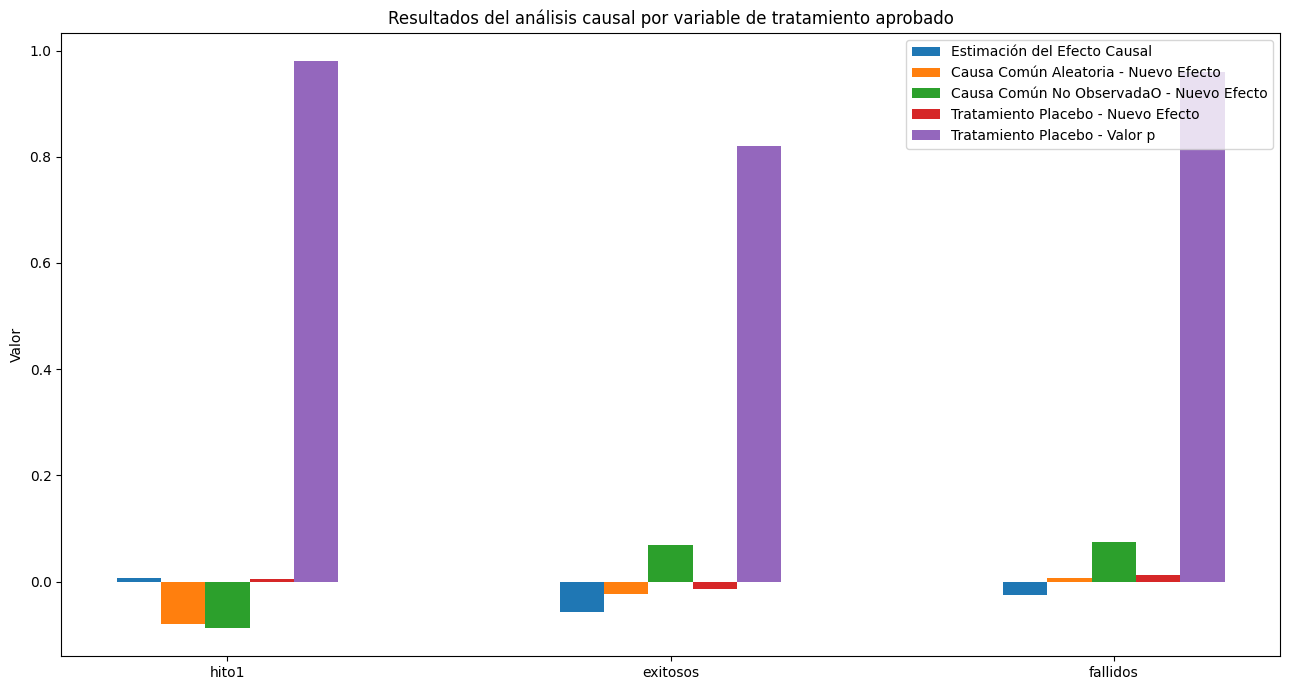

In [48]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(13, 7))

# Crear un rango de valores x para cada variable de tratamiento
x = np.arange(len(results_df["modelo"]))

# Ancho de las barras
width = 0.1

# Crear gráficos de barras para cada métrica
plt.bar(
    x - 2 * width,
    results_df["Estimación del Efecto Causal"],
    width,
    label="Estimación del Efecto Causal",
)
plt.bar(
    x - width,
    results_df["CCA - Nuevo Efecto"],
    width,
    label="Causa Común Aleatoria - Nuevo Efecto",
)
plt.bar(
    x,
    results_df["CCNO - Nuevo Efecto"],
    width,
    label="Causa Común No Observada - Nuevo Efecto",
)
plt.bar(
    x + width,
    results_df["TP - Nuevo Efecto"],
    width,
    label="Tratamiento Placebo - Nuevo Efecto",
)
plt.bar(
    x + 2 * width,
    results_df["TP - Valor p"],
    width,
    label="Tratamiento Placebo - Valor p",
)

# Añadir etiquetas, título, leyenda, etc.
plt.ylabel("Valor")
plt.title("Resultados del análisis causal por variable de tratamiento aprobado")
plt.xticks(x, results_df["modelo"])
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Conclusión

A través del análisis causal realizado, se investigó cómo diferentes variables asociadas a una guía de apoyo podrían influir en la probabilidad de aprobar la primera evaluación del curso. Las variables de interés incluyeron `hito1`, `exitosos`, y `fallidos`.

# Resultados Numéricos

Los modelos causales construidos proporcionaron las siguientes estimaciones del efecto causal y valores p para el tratamiento placebo:

1. **Estimación del Efecto Causal**:

   - Los modelos causales sugieren una asociación entre las variables de interés y la probabilidad de aprobar, aunque la magnitud y dirección de estas asociaciones varían.

2. **Resultados Numéricos**:

   - **Modelo hito1**:
     - Estimación del Efecto Causal: 0.007127
     - Causa Común No Observada - Nuevo Efecto: -0.087425
     - Tratamiento Placebo - Nuevo Efecto: 0.004924
     - Tratamiento Placebo - Valor p: 0.98
   - **Modelo exitosos**:
     - Estimación del Efecto Causal: -0.057384
     - Causa Común No Observada - Nuevo Efecto: 0.068245
     - Tratamiento Placebo - Nuevo Efecto: -0.013244
     - Tratamiento Placebo - Valor p: 0.82
   - **Modelo fallidos**:
     - Estimación del Efecto Causal: -0.025787
     - Causa Común No Observada - Nuevo Efecto: 0.075304
     - Tratamiento Placebo - Nuevo Efecto: 0.012143
     - Tratamiento Placebo - Valor p: 0.96

3. **Refutaciones**:

   - Las refutaciones indican una posible sensibilidad de la estimación del efecto causal a causas comunes no observadas y aleatorias, lo que sugiere la necesidad de explorar más a fondo las suposiciones del modelo.

4. **Tratamiento Placebo - Interpretación**:

   - El tratamiento placebo en el análisis introduce una variable de tratamiento ficticia para evaluar la robustez de las estimaciones del efecto causal.

5. **Interpretación del Valor p**:

   - Un valor p bajo (≤ 0.05) sugiere que los resultados son estadísticamente significativos y que es menos probable que sean producto del azar.
   - Un valor p alto (> 0.05) sugiere que los resultados no son estadísticamente significativos y que la relación observada podría ser producto del azar.
   - En este análisis, los valores p altos en el tratamiento placebo indican que las estimaciones del efecto causal no son estadísticamente significativas.

6. **Relevancia de las Variables**:

   - Entre las tres variables, `exitosos` mostró el mayor cambio en la estimación del efecto en la refutación de Causa Común No Observada, lo que podría indicar una mayor relevancia o sensibilidad de esta variable en el análisis causal.

7. **Implicaciones**:

   - Los resultados proporcionan una visión inicial sobre cómo la guía de apoyo podría influir en la probabilidad de aprobar la primera evaluación del curso. Sin embargo, la interpretación de la relevancia y el impacto de las variables requiere una consideración cuidadosa de las suposiciones del modelo y posiblemente una exploración adicional mediante análisis de sensibilidad o recopilación de datos adicionales.

8. **Consideraciones Adicionales**:
   - También es crucial considerar la calidad y la cantidad de los datos, así como la adecuación de las suposiciones del modelo y la metodología de análisis.

Este análisis representa un paso inicial hacia la comprensión de las relaciones causales entre la participación en una guía de apoyo y el rendimiento académico, y destaca la importancia de considerar las suposiciones del modelo y las variables confundidoras en la interpretación de los resultados.


In [41]:
print(results_df)

     modelo  Estimación del Efecto Causal       Tipo (Causa Común Aleatoria)  \
0     hito1                      0.007127  Refute: Add a random common cause   
1  exitosos                     -0.057384  Refute: Add a random common cause   
2  fallidos                     -0.025787  Refute: Add a random common cause   

   CCA Efecto Estimado  CCA - Nuevo Efecto  CCA - Valor p  \
0             0.007127           -0.080926           0.68   
1            -0.057384           -0.024325           0.84   
2            -0.025787            0.005730           0.80   

          Tipo (Causa Común No Observada)  CCNO - Efecto Estimado  \
0  Refute: Add an Unobserved Common Cause                0.007127   
1  Refute: Add an Unobserved Common Cause               -0.057384   
2  Refute: Add an Unobserved Common Cause               -0.025787   

   CCNO - Nuevo Efecto       Tipo (Tratamiento Placebo)  TP - Efecto Estimado  \
0            -0.087425  Refute: Use a Placebo Treatment              0.00712